In [170]:
#Import Packages, View and Load Data

In [171]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")

In [172]:
loan_data = pd.read_csv('df1_loan.csv')

In [173]:
loan_data2 = loan_data.dropna()

In [174]:
loan_data2.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0
5,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,$9613.0


In [175]:
#Below: Even distribution of living location with a few outliers

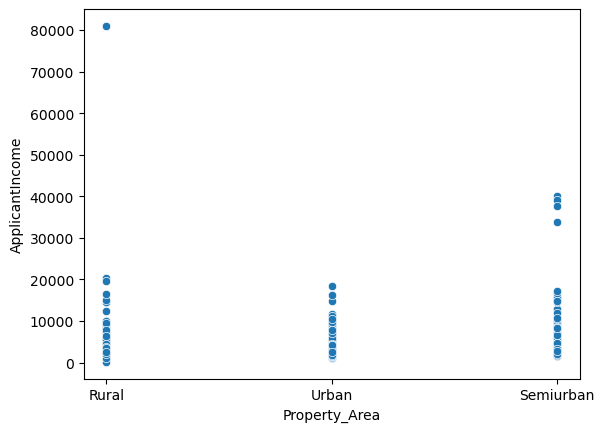

In [176]:
sns.scatterplot(data=loan_data2, x="Property_Area", y="ApplicantIncome")
plt.show()

In [177]:
#Below: Less than 1/3 of applicants live in rural areas

([<matplotlib.patches.Wedge at 0x1de8ae97e20>,
 [Text(0.3483347731428033, 1.0433900928317998, 'Semiurban'),
  Text(-1.0253423836336644, -0.3983377917351498, 'Urban'),
  Text(0.7025310902431086, -0.8464337347021499, 'Rural')],
 [Text(0.19000078535061996, 0.5691218688173453, '39.7%'),
  Text(-0.5592776638001805, -0.2172751591282635, '32.3%'),
  Text(0.38319877649624096, -0.4616911280193544, '27.9%')])

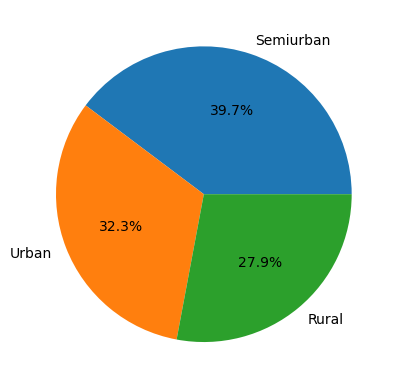

In [178]:
plt.pie(x=loan_data2['Property_Area'].value_counts().values, labels=loan_data2['Property_Area'].value_counts().index, autopct='%1.1f%%')

In [179]:
# Below: 3/5 of applicants support only themselves

([<matplotlib.patches.Wedge at 0x1de8aef81f0>,
 [Text(-0.3060392914758636, 1.056569899283976, '0'),
  Text(-0.5190245937971573, -0.9698522934105461, '1'),
  Text(0.5652756834211458, -0.9436436836713087, '2'),
  Text(1.0636565361455146, -0.28041892431668314, '3+')],
 [Text(-0.16693052262319832, 0.576310854154896, '59.0%'),
  Text(-0.28310432388935847, -0.5290103418602978, '16.4%'),
  Text(0.30833219095698855, -0.5147147365479865, '16.4%'),
  Text(0.580176292443008, -0.15295577690000897, '8.2%')])

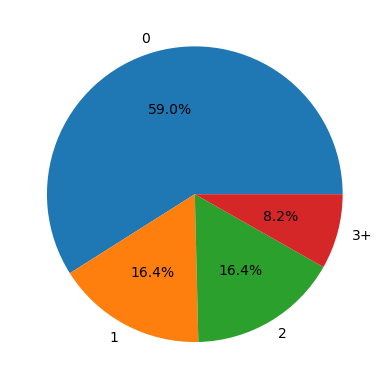

In [180]:
plt.pie(x=loan_data2['Dependents'].value_counts().values, labels=loan_data2['Dependents'].value_counts().index, autopct='%1.1f%%')

In [181]:
#Below: Educated applicants are our primary source of applicants

([<matplotlib.patches.Wedge at 0x1de8af8ac40>,
 [Text(-0.8899187180267095, 0.6465637441936395, 'Graduate'),
  Text(0.8899187482945414, -0.6465637025335375, 'Not Graduate')],
 [Text(-0.48541020983275057, 0.3526711331965306, '80.0%'),
  Text(0.4854102263424771, -0.3526711104728386, '20.0%')])

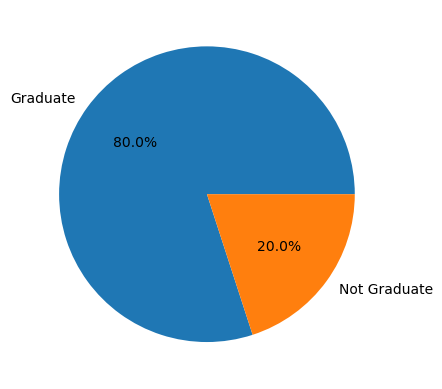

In [182]:
plt.pie(x=loan_data2['Education'].value_counts().values, labels=loan_data['Education'].value_counts().index, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x1de8afde670>,
 [Text(-1.0049000145774143, 0.44741028229390584, 'No'),
  Text(1.0049000355222, -0.4474102352511412, 'Yes')],
 [Text(-0.5481272806785896, 0.24404197216031226, '86.7%'),
  Text(0.548127292103018, -0.24404194650062244, '13.3%')])

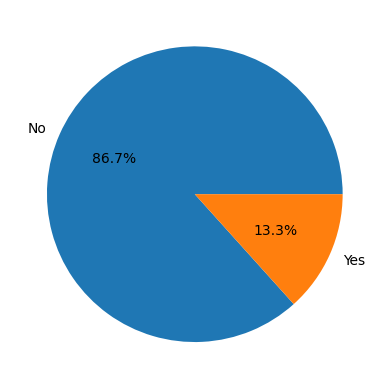

In [183]:
plt.pie(x=loan_data2['Self_Employed'].value_counts().values, labels=loan_data['Self_Employed'].value_counts().index, autopct='%1.1f%%')

Text(0, 0.5, 'count')

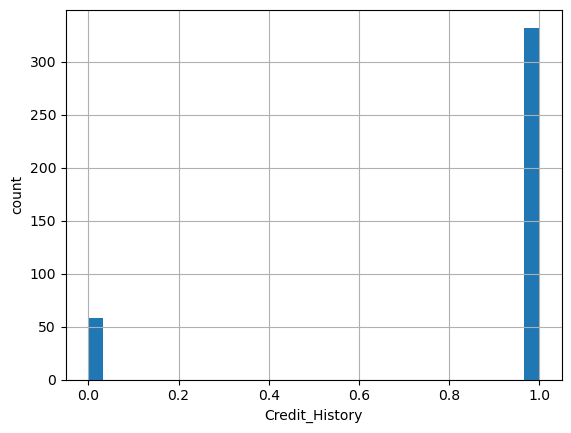

In [184]:
loan_data2.Credit_History.hist(bins=30)
plt.xlabel('Credit_History')
plt.ylabel('count')

In [185]:
#Below: Credit history has a minor correlation in application approval

Text(0, 0.5, 'count')

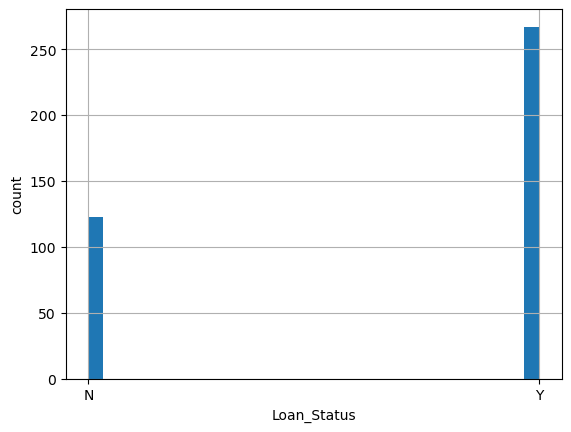

In [186]:
loan_data2.Loan_Status.hist(bins=30)
plt.xlabel('Loan_Status')
plt.ylabel('count')

In [187]:
encoded = pd.get_dummies(loan_data2, columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']) 
print(encoded)

     Unnamed: 0   Loan_ID Dependents  ApplicantIncome  CoapplicantIncome  \
1             1  LP001003          1             4583             1508.0   
2             2  LP001005          0             3000                0.0   
3             3  LP001006          0             2583             2358.0   
4             4  LP001008          0             6000                0.0   
5             5  LP001011          2             5417             4196.0   
..          ...       ...        ...              ...                ...   
494         494  LP002585          0             3597             2157.0   
495         495  LP002586          1             3326              913.0   
496         496  LP002587          0             2600             1700.0   
498         498  LP002600          1             2895                0.0   
499         499  LP002602          0             6283             4416.0   

     LoanAmount  Loan_Amount_Term  Credit_History Total_Income  Gender_Female  \
1     

In [188]:
# Strong Correlation in Applicant income, credit history, and loan amount

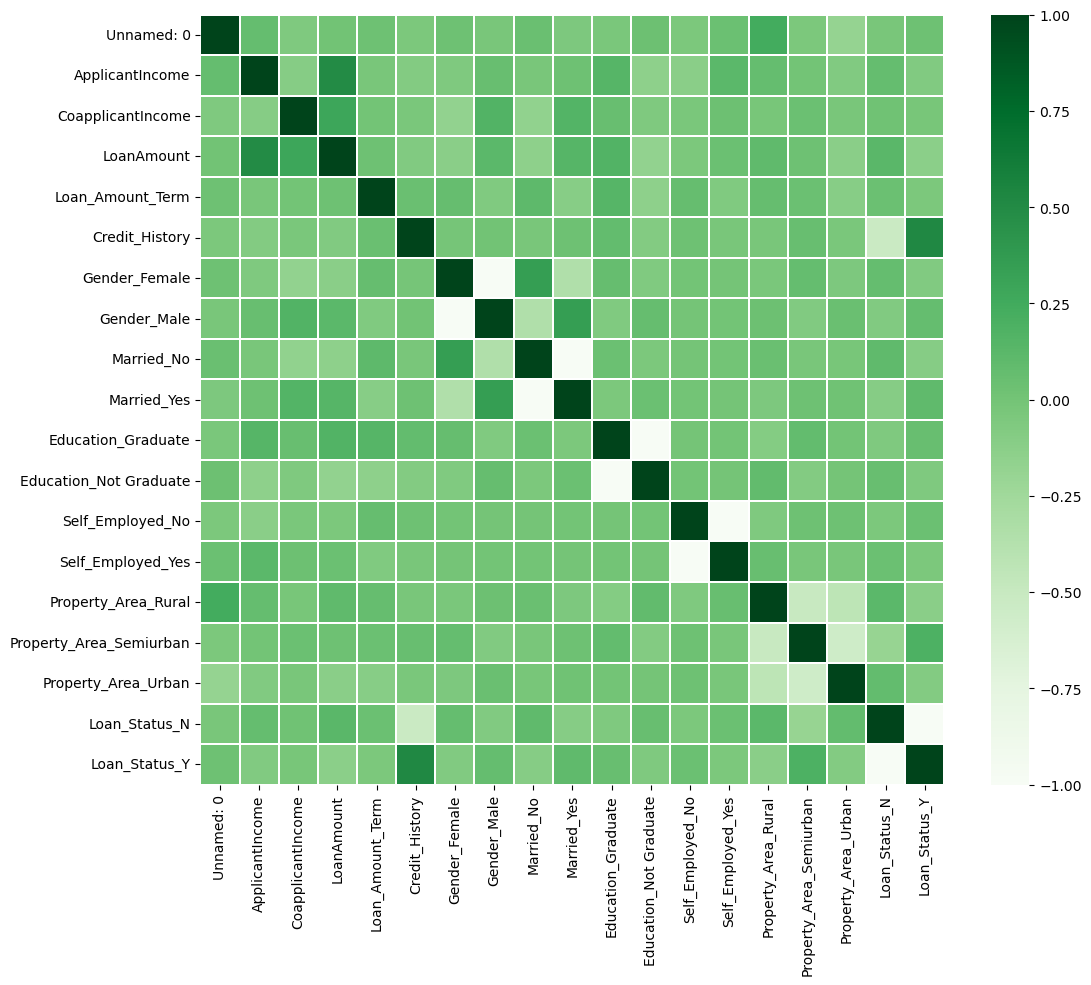

In [189]:
plt.subplots(figsize=(12,10))
sns.heatmap(encoded.corr(), linewidths=.1, cmap= 'Greens');

In [190]:
#Below: Income not affilated with loan status

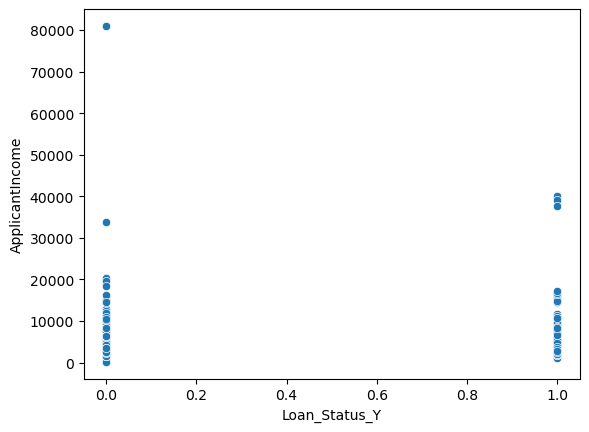

In [191]:
sns.scatterplot(data=encoded, x="Loan_Status_Y", y="ApplicantIncome")
plt.show()

In [192]:
#Summary: Through the eda we are starting to see correlations in credit history and loan status. Income is not much of a factor, as the one with the highest income was denied loan acceptance. 